In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import scipy.stats as st
%matplotlib inline

### PROBLEM 1:

In [2]:
# Reshape dataset election_train from long format to wide format
data=pd.read_csv("election_train.csv")
data

Year State             County      Office       Party    Votes
0     2018    AZ      Apache County  US Senator  Democratic  16298.0
1     2018    AZ      Apache County  US Senator  Republican   7810.0
2     2018    AZ     Cochise County  US Senator  Democratic  17383.0
3     2018    AZ     Cochise County  US Senator  Republican  26929.0
4     2018    AZ    Coconino County  US Senator  Democratic  34240.0
...    ...   ...                ...         ...         ...      ...
2405  2018    WY  Sweetwater County  US Senator  Republican   8577.0
2406  2018    WY       Uinta County  US Senator  Democratic   1371.0
2407  2018    WY       Uinta County  US Senator  Republican   4713.0
2408  2018    WY    Washakie County  US Senator  Democratic    588.0
2409  2018    WY    Washakie County  US Senator  Republican   2423.0

[2410 rows x 6 columns]

In [3]:
data.shape

(2410, 6)

In [4]:
data=data.pivot_table(index = ['Year','County','Office','State'], columns = ["Party"], values = 'Votes',aggfunc='sum').reset_index()
data

Party  Year         County      Office State  Democratic  Republican
0      2018   Adams County  US Senator    IN      3146.0      7511.0
1      2018   Adams County  US Senator    ND       364.0       796.0
2      2018   Adams County  US Senator    NE      3334.0      6487.0
3      2018   Adams County  US Senator    OH      2635.0      6000.0
4      2018   Adams County  US Senator    PA     14880.0     23419.0
...     ...            ...         ...   ...         ...         ...
1200   2018    York County  US Senator    ME     51387.0     32849.0
1201   2018    York County  US Senator    NE      1281.0      3659.0
1202   2018    York County  US Senator    PA     69272.0     95814.0
1203   2018   Young County  US Senator    TX       821.0      5543.0
1204   2018  Zapata County  US Senator    TX      1392.0       821.0

[1205 rows x 6 columns]

In [5]:
data.shape

(1205, 6)

### PROBLEM 2:

In [6]:
#  Merge reshaped dataset election_train with dataset demographics_train. Make sure that you address all inconsistencies in the names of the states and the counties
# before merging.
Demographic_Data=pd.read_csv("demographics_train.csv")
Demographic_Data

State      County   FIPS  Total Population  \
0     Wisconsin   La Crosse  55063            117538   
1      Virginia   Alleghany  51005             15919   
2       Indiana    Fountain  18045             16741   
3          Ohio      Geauga  39055             94020   
4     Wisconsin     Jackson  55053             20566   
...         ...         ...    ...               ...   
1211    Montana     Lincoln  30053             19268   
1212       Ohio  Tuscarawas  39157             92579   
1213   Michigan     Newaygo  26123             47957   
1214  Tennessee  Lauderdale  47097             27261   
1215      Texas      Sabine  48403             10367   

      Citizen Voting-Age Population  Percent White, not Hispanic or Latino  \
0                                 0                              90.537528   
1                             12705                              91.940449   
2                             12750                              95.705155   
3                                 0                              95.837056   
4                             15835                              86.662453   
...                             ...                                    ...   
1211                          15640                              93.351671   
1212                          70485                              95.155489   
1213                              0                              90.716684   
1214                              0                              60.456330   
1215                              0                              86.341275   

      Percent Black, not Hispanic or Latino  Percent Hispanic or Latino  \
0                                  1.214075                    1.724549   
1                                  5.207614                    1.432251   
2                                  0.400215                    2.359477   
3                                  1.256116                    1.294405   
4                                  1.983857                    3.082758   
...                                     ...                         ...   
1211                               0.057089                    2.678015   
1212                               0.804718                    2.349345   
1213                               1.317847                    5.728048   
1214                              34.789626                    2.380690   
1215                               7.080158                    3.839105   

      Percent Foreign Born  Percent Female  Percent Age 29 and Under  \
0                 2.976059       51.171536                 43.241335   
1                 1.300333       51.077329                 31.660280   
2                 1.547100       49.770026                 35.899887   
3                 2.578175       50.678579                 36.281642   
4                 1.376058       46.649810                 36.292911   
...                    ...             ...                       ...   
1211              2.345858       49.974050                 27.979033   
1212              1.650482       50.823621                 36.475875   
1213              1.978856       49.656984                 36.620306   
1214              1.757089       47.734859                 39.528997   
1215              0.752387       50.506415                 31.243368   

      Percent Age 65 and Older  Median Household Income  Percent Unemployed  \
0                    14.702479                    51477            4.796952   
1                    23.902255                    45538            4.560986   
2                    18.941521                    45924            7.978789   
3                    18.028079                    74165            4.036902   
4                    17.587280                    49608            5.569698   
...                        ...                      ...                 ...   
1211                 24.828732                    35461           11.570571   
12

In [7]:
# Since all the states are abbrevated in election_train, we map the states to abbrevated forms in the Demographics_train

In [8]:
us_state_abbrev={'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'}


In [9]:
Demographic_Data["State"]=Demographic_Data["State"].map(us_state_abbrev)
Demographic_Data

State      County   FIPS  Total Population  \
0       WI   La Crosse  55063            117538   
1       VA   Alleghany  51005             15919   
2       IN    Fountain  18045             16741   
3       OH      Geauga  39055             94020   
4       WI     Jackson  55053             20566   
...    ...         ...    ...               ...   
1211    MT     Lincoln  30053             19268   
1212    OH  Tuscarawas  39157             92579   
1213    MI     Newaygo  26123             47957   
1214    TN  Lauderdale  47097             27261   
1215    TX      Sabine  48403             10367   

      Citizen Voting-Age Population  Percent White, not Hispanic or Latino  \
0                                 0                              90.537528   
1                             12705                              91.940449   
2                             12750                              95.705155   
3                                 0                              95.837056   
4                             15835                              86.662453   
...                             ...                                    ...   
1211                          15640                              93.351671   
1212                          70485                              95.155489   
1213                              0                              90.716684   
1214                              0                              60.456330   
1215                              0                              86.341275   

      Percent Black, not Hispanic or Latino  Percent Hispanic or Latino  \
0                                  1.214075                    1.724549   
1                                  5.207614                    1.432251   
2                                  0.400215                    2.359477   
3                                  1.256116                    1.294405   
4                                  1.983857                    3.082758   
...                                     ...                         ...   
1211                               0.057089                    2.678015   
1212                               0.804718                    2.349345   
1213                               1.317847                    5.728048   
1214                              34.789626                    2.380690   
1215                               7.080158                    3.839105   

      Percent Foreign Born  Percent Female  Percent Age 29 and Under  \
0                 2.976059       51.171536                 43.241335   
1                 1.300333       51.077329                 31.660280   
2                 1.547100       49.770026                 35.899887   
3                 2.578175       50.678579                 36.281642   
4                 1.376058       46.649810                 36.292911   
...                    ...             ...                       ...   
1211              2.345858       49.974050                 27.979033   
1212              1.650482       50.823621                 36.475875   
1213              1.978856       49.656984                 36.620306   
1214              1.757089       47.734859                 39.528997   
1215              0.752387       50.506415                 31.243368   

      Percent Age 65 and Older  Median Household Income  Percent Unemployed  \
0                    14.702479                    51477            4.796952   
1                    23.902255                    45538            4.560986   
2                    18.941521                    45924            7.978789   
3                    18.028079                    74165            4.036902   
4                    17.587280                    49608            5.569698   
...                        ...                      ...                 ...   
1211                 24.828732                    35461           11.570571   
1212                 17.836658                    46992  

In [10]:
# since the county names have "county" in the end of the county names in the election_train data and not in Demographics data ,
# we remove them from the election_train data

In [11]:
data["County"]=data["County"].str.replace("County","")
data["County"]=data["County"].str.strip()

In [12]:
# To ensure they are no case issues we change all the names of counties to lower case and
# Abbrevated states to upper case

In [13]:
data["County"]=data["County"].apply(lambda x:x.lower())
data["State"]=data["State"].apply(lambda x:x.upper())

In [14]:
Demographic_Data["County"]=Demographic_Data["County"].apply(lambda x:x.lower())
Demographic_Data["State"]=Demographic_Data["State"].apply(lambda x:x.upper())

In [15]:
Demographic_Data=Demographic_Data.sort_values(["State","County"])
Demographic_Data.shape

(1216, 17)

In [16]:
mergedData = pd.merge(data,Demographic_Data,how='inner',on=["County","State"])
mergedData.head()
mergedData.shape


(1200, 21)

### PROBLEM 3:

In [17]:
mergedData

Year  County      Office State  Democratic  Republican   FIPS  \
0     2018   adams  US Senator    IN      3146.0      7511.0  18001   
1     2018   adams  US Senator    ND       364.0       796.0  38001   
2     2018   adams  US Senator    NE      3334.0      6487.0  31001   
3     2018   adams  US Senator    OH      2635.0      6000.0  39001   
4     2018   adams  US Senator    PA     14880.0     23419.0  42001   
...    ...     ...         ...   ...         ...         ...    ...   
1195  2018    york  US Senator    ME     51387.0     32849.0  23031   
1196  2018    york  US Senator    NE      1281.0      3659.0  31185   
1197  2018    york  US Senator    PA     69272.0     95814.0  42133   
1198  2018   young  US Senator    TX       821.0      5543.0  48503   
1199  2018  zapata  US Senator    TX      1392.0       821.0  48505   

      Total Population  Citizen Voting-Age Population  \
0                34813                              0   
1                 2348                              0   
2                31536                              0   
3                28111                              0   
4               101759                          78370   
...                ...                            ...   
1195            200536                              0   
1196             13842                          10570   
1197            440604                         334780   
1198             18275                              0   
1199             14335                              0   

      Percent White, not Hispanic or Latino  ...  Percent Hispanic or Latino  \
0                                 93.740844  ...                    4.403527   
1                                 93.100511  ...                    0.851789   
2                                 87.338280  ...                    8.907281   
3                                 96.673900  ...                    0.522927   
4                                 89.762085  ...                    6.604821   
...                                     ...  ...                         ...   
1195                              94.761539  ...                    1.556828   
1196                              91.619708  ...                    4.681404   
1197                              84.725513  ...                    6.649735   
1198                              79.102599  ...                   17.668947   
1199                               5.866760  ...                   94.119288   

      Percent Foreign Born  Percent Female  Percent Age 29 and Under  \
0                 0.901962       50.389222                 45.313532   
1                 1.916525       49.446337                 32.282794   
2                 5.717275       49.242136                 41.365424   
3                 0.640319       50.297037                 37.319910   
4                 3.978027       50.636307                 35.814031   
...                    ...             ...                       ...   
1195              3.068277       51.174851                 33.230442   
1196              1.719405       50.881376                 38.289265   
1197              3.599150       50.565133                 36.839883   
1198              5.389877       50.768810                 36.990424   
1199             29.180328       49.877921                 50.931287   

      Percent Age 65 and Older  Median Household Income  Percent Unemployed  \
0                    14.457243                    47572            5.462632   
1                    22.274276                    53295            1.977848   
2                    16.504947                    51201            5.380389   
3                    16.395717                    34709            9.907997   
4                    18.255879                    61927            5.524955   
...                        ...                      ...                 ...   
1195                 17.911996                    59132            5.110303   
1196      

In [18]:
mergedData["Year"].unique()

array([2018])

In [19]:
mergedData["Office"].unique()

array(['US Senator'], dtype=object)

In [20]:
mergedData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 0 to 1199
Data columns (total 21 columns):
Year                                     1200 non-null int64
County                                   1200 non-null object
Office                                   1200 non-null object
State                                    1200 non-null object
Democratic                               1200 non-null float64
Republican                               1200 non-null float64
FIPS                                     1200 non-null int64
Total Population                         1200 non-null int64
Citizen Voting-Age Population            1200 non-null int64
Percent White, not Hispanic or Latino    1200 non-null float64
Percent Black, not Hispanic or Latino    1200 non-null float64
Percent Hispanic or Latino               1200 non-null float64
Percent Foreign Born                     1200 non-null float64
Percent Female                           1200 non-null float64
Percent Age 29 and Und

In [21]:
mergedData=mergedData.drop(["Year","Office"],axis=1)
mergedData.shape


(1200, 19)

### PROBLEM 4:

Since we have set all null values to 0's using addfunc=sum in first task, we have 0's as null values in the current data

In [22]:
for col in mergedData.columns: 
    print(len(mergedData[mergedData[col]==0]),col)
   

0 County
0 State
5 Democratic
5 Republican
0 FIPS
0 Total Population
680 Citizen Voting-Age Population
0 Percent White, not Hispanic or Latino
45 Percent Black, not Hispanic or Latino
5 Percent Hispanic or Latino
3 Percent Foreign Born
0 Percent Female
0 Percent Age 29 and Under
0 Percent Age 65 and Older
0 Median Household Income
3 Percent Unemployed
0 Percent Less than High School Degree
0 Percent Less than Bachelor's Degree
19 Percent Rural


Since we notice that 5 of Democratic Republic values are Zeroes and we are working on analysing the votes between Democratic and Republican Parties we eliminate those 5 observations. And also we notice that there are 680 0's in Citizen Voting-Age Population, we eliminate the column. and since rest observations that are zeroes are not many and have Democratic and Republican , we keep them.

In [23]:
mergedData.drop("Citizen Voting-Age Population",axis=1,inplace=True)

In [24]:
mergedData=mergedData[mergedData.Democratic != 0]
mergedData.shape

(1195, 18)

### PROBLEM 5:

In [25]:
mergedData["Party"]=np.where(mergedData.Democratic>mergedData.Republican,1,0)
mergedData

County State  Democratic  Republican   FIPS  Total Population  \
0      adams    IN      3146.0      7511.0  18001             34813   
1      adams    ND       364.0       796.0  38001              2348   
2      adams    NE      3334.0      6487.0  31001             31536   
3      adams    OH      2635.0      6000.0  39001             28111   
4      adams    PA     14880.0     23419.0  42001            101759   
...      ...   ...         ...         ...    ...               ...   
1195    york    ME     51387.0     32849.0  23031            200536   
1196    york    NE      1281.0      3659.0  31185             13842   
1197    york    PA     69272.0     95814.0  42133            440604   
1198   young    TX       821.0      5543.0  48503             18275   
1199  zapata    TX      1392.0       821.0  48505             14335   

      Percent White, not Hispanic or Latino  \
0                                 93.740844   
1                                 93.100511   
2                                 87.338280   
3                                 96.673900   
4                                 89.762085   
...                                     ...   
1195                              94.761539   
1196                              91.619708   
1197                              84.725513   
1198                              79.102599   
1199                               5.866760   

      Percent Black, not Hispanic or Latino  Percent Hispanic or Latino  \
0                                  0.709505                    4.403527   
1                                  0.894378                    0.851789   
2                                  0.821284                    8.907281   
3                                  0.355733                    0.522927   
4                                  1.352215                    6.604821   
...                                     ...                         ...   
1195                               0.839749                    1.556828   
1196                               0.809132                    4.681404   
1197                               5.254605                    6.649735   
1198                               1.258550                   17.668947   
1199                               0.013952                   94.119288   

      Percent Foreign Born  Percent Female  Percent Age 29 and Under  \
0                 0.901962       50.389222                 45.313532   
1                 1.916525       49.446337                 32.282794   
2                 5.717275       49.242136                 41.365424   
3                 0.640319       50.297037                 37.319910   
4                 3.978027       50.636307                 35.814031   
...                    ...             ...                       ...   
1195              3.068277       51.174851                 33.230442   
1196              1.719405       50.881376                 38.289265   
1197              3.599150       50.565133                 36.839883   
1198              5.389877       50.768810                 36.990424   
1199             29.180328       49.877921                 50.931287   

      Percent Age 65 and Older  Median Household Income  Percent Unemployed  \
0                    14.457243                    47572            5.462632   
1                    22.274276                    53295            1.977848   
2                    16.504947                    51201            5.380389   
3                    16.395717                    34709            9.907997   
4                    18.255879                    61927            5.524955   
...                        ...                      ...                 ...   
1195                 17.911996                    59132            5.110303   
1196                 18.841208                    55156            1.432079   
1197                 15.841663                    59853            6.240874   
1198                 19.387141  

In [26]:
Democratic=mergedData[mergedData["Party"]==1]
Republican=mergedData[mergedData["Party"]==0]
# Democratic["Total Population"].mean()
# Republican["Total Population"].mean()


### PROBLEM 6:

In [27]:
mergedData.loc[mergedData.Party ==1]["Total Population" ].mean()

300998.3169230769

In [28]:
mergedData.loc[mergedData.Party ==0]["Total Population" ].mean()


53864.6724137931

In [29]:
[statistic, pvalue] = st.ttest_ind(Democratic["Total Population"],Republican["Total Population"],equal_var=False)
print(statistic)
print(pvalue/2)
significanceLevel = 0.05
if pvalue > significanceLevel:
    print('Do not reject null hypothesis)')
else:
    print('Reject null hypothesis')

8.004638577960957
1.0239358801486512e-14
Reject null hypothesis


### PROBLEM 7:

In [30]:
mergedData.loc[mergedData.Party ==1]["Median Household Income" ].mean()


53798.732307692306

In [31]:
mergedData.loc[mergedData.Party ==0]["Median Household Income" ].mean()


48746.81954022989

In [32]:
import scipy.stats as st
[statistic, pvalue] = st.ttest_ind(Democratic["Median Household Income"],Republican["Median Household Income"],equal_var=False)
print(statistic)
print(pvalue/2)
significanceLevel = 0.05
if pvalue > significanceLevel:
    print('Do not reject null Hypothesis)')
else:
    print('Reject null Hypothesis')

5.479141589767387
3.574718681591299e-08
Reject null Hypothesis


### PROBLEM 8:

In [33]:
Democratic.columns


Index(['County', 'State', 'Democratic', 'Republican', 'FIPS',
       'Total Population', 'Percent White, not Hispanic or Latino',
       'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino',
       'Percent Foreign Born', 'Percent Female', 'Percent Age 29 and Under',
       'Percent Age 65 and Older', 'Median Household Income',
       'Percent Unemployed', 'Percent Less than High School Degree',
       'Percent Less than Bachelor's Degree', 'Percent Rural', 'Party'],
      dtype='object')

### AGE:

In [34]:
Democratic['Percent Age 30 to 64'] = 100 - mergedData['Percent Age 29 and Under'] - mergedData['Percent Age 65 and Older']

In [35]:
Democratic[["Percent Age 29 and Under",'Percent Age 30 to 64',"Percent Age 65 and Older",]].describe()

Percent Age 29 and Under  Percent Age 30 to 64  \
count                325.000000            325.000000   
mean                  38.726959             45.078214   
std                    6.252786              3.907598   
min                   23.156452             18.433769   
25%                   34.488444             43.741937   
50%                   38.074151             45.817819   
75%                   42.161162             47.448269   
max                   67.367823             57.478906   

       Percent Age 65 and Older  
count                325.000000  
mean                  16.194826  
std                    4.282422  
min                    6.653188  
25%                   13.106233  
50%                   15.698087  
75%                   18.806426  
max                   31.642106

In [36]:
Republican['Percent Age 30 to 64'] = 100 - mergedData['Percent Age 29 and Under'] - mergedData['Percent Age 65 and Older']

In [37]:
Republican[["Percent Age 29 and Under",'Percent Age 30 to 64',"Percent Age 65 and Older",]].describe()

Percent Age 29 and Under  Percent Age 30 to 64  \
count                870.000000            870.000000   
mean                  36.005719             45.166015   
std                    5.181522              2.910264   
min                   11.842105             27.421759   
25%                   32.983652             43.522522   
50%                   35.846532             45.553295   
75%                   38.539787             46.975771   
max                   58.749116             63.157895   

       Percent Age 65 and Older  
count                870.000000  
mean                  18.828267  
std                    4.733155  
min                    6.954387  
25%                   15.784982  
50%                   18.377896  
75%                   21.112847  
max                   37.622759

### GENDER:

In [38]:
Democratic['Percent Female'].describe()

count    325.000000
mean      50.385433
std        2.149359
min       34.245291
25%       49.854280
50%       50.653830
75%       51.492075
max       56.418468
Name: Percent Female, dtype: float64

In [39]:
Republican['Percent Female'].describe()

count    870.000000
mean      49.630898
std        2.429013
min       21.513413
25%       49.222905
50%       50.176792
75%       50.829770
max       55.885023
Name: Percent Female, dtype: float64

### EDUCATION:

In [40]:
Democratic[['Percent Less than High School Degree',
       "Percent Less than Bachelor's Degree"]].describe()

Percent Less than High School Degree  \
count                            325.000000   
mean                              11.883760   
std                                6.505613   
min                                3.215803   
25%                                7.893714   
50%                               10.370080   
75%                               13.637059   
max                               49.673777   

       Percent Less than Bachelor's Degree  
count                           325.000000  
mean                             71.968225  
std                              11.192404  
min                              26.335440  
25%                              65.711800  
50%                              72.736143  
75%                              79.903653  
max                              94.849957

In [41]:
Republican[['Percent Less than High School Degree',
       "Percent Less than Bachelor's Degree"]].describe()

Percent Less than High School Degree  \
count                            870.000000   
mean                              14.009112   
std                                6.303126   
min                                2.134454   
25%                                9.662491   
50%                               12.572435   
75%                               17.447168   
max                               47.812773   

       Percent Less than Bachelor's Degree  
count                           870.000000  
mean                             81.095427  
std                               6.815537  
min                              43.419470  
25%                              78.108424  
50%                              82.406700  
75%                              85.546272  
max                              97.014925

### RACE AND ETHNICITY:

In [42]:
Democratic[['Percent White, not Hispanic or Latino','Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino',
       'Percent Foreign Born']].describe()

Percent White, not Hispanic or Latino  \
count                             325.000000   
mean                               69.683766   
std                                24.981502   
min                                 2.776702   
25%                                53.271579   
50%                                77.786090   
75%                                90.300749   
max                                98.063495   

       Percent Black, not Hispanic or Latino  Percent Hispanic or Latino  \
count                             325.000000                  325.000000   
mean                                9.242649                   12.587391   
std                                13.351340                   19.575030   
min                                 0.000000                    0.193349   
25%                                 0.839103                    2.531017   
50%                                 3.485992                    5.039747   
75%                                11.058843                   11.857116   
max                                63.953279                   95.479801   

       Percent Foreign Born  
count            325.000000  
mean               7.986330  
std                8.330740  
min                0.179769  
25%                2.470508  
50%                5.105490  
75%               10.144555  
max               52.229868

In [43]:
Republican[['Percent White, not Hispanic or Latino','Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino',
       'Percent Foreign Born']].describe()

Percent White, not Hispanic or Latino  \
count                             870.000000   
mean                               82.656646   
std                                16.056122   
min                                18.758977   
25%                                75.016397   
50%                                89.434849   
75%                                94.466596   
max                                99.627329   

       Percent Black, not Hispanic or Latino  Percent Hispanic or Latino  \
count                             870.000000                  870.000000   
mean                                4.189241                    9.733094   
std                                 6.721695                   14.049576   
min                                 0.000000                    0.000000   
25%                                 0.460419                    1.704539   
50%                                 1.318311                    3.427435   
75%                                 4.753831                   10.709696   
max                                41.563041                   78.397012   

       Percent Foreign Born  
count            870.000000  
mean               3.990096  
std                4.507786  
min                0.000000  
25%                1.320101  
50%                2.326317  
75%                5.149429  
max               37.058317

In [44]:
mergedData.corr()['Party']

Democratic                               0.387669
Republican                               0.282067
FIPS                                    -0.054173
Total Population                         0.344934
Percent White, not Hispanic or Latino   -0.292306
Percent Black, not Hispanic or Latino    0.242134
Percent Hispanic or Latino               0.080481
Percent Foreign Born                     0.293307
Percent Female                           0.141178
Percent Age 29 and Under                 0.215438
Percent Age 65 and Older                -0.246292
Median Household Income                  0.182795
Percent Unemployed                       0.081322
Percent Less than High School Degree    -0.147230
Percent Less than Bachelor's Degree     -0.442503
Percent Rural                           -0.376470
Party                                    1.000000
Name: Party, dtype: float64

In [45]:
# mergedData1['Percent Age 30 to 64'] = 100 - merged_data['Percent Age 29 and Under'] - merged_data['Percent Age 65 and Older']

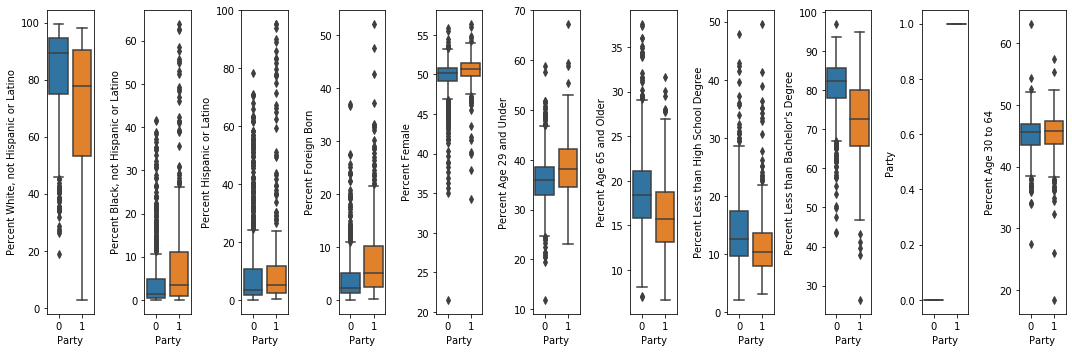

In [46]:
mergedData1=mergedData.drop(["County","State","Democratic","Republican","FIPS","Total Population","Median Household Income","Percent Unemployed","Percent Rural"],axis=1)
mergedData1['Percent Age 30 to 64'] = 100 - mergedData['Percent Age 29 and Under'] - mergedData['Percent Age 65 and Older']
num_columns = len(mergedData1.columns)
fig, axes = plt.subplots(1, num_columns, figsize = (15, 5))
for i in range(num_columns):
    sns.boxplot(x = 'Party', y = mergedData1.columns[i], data = mergedData1, orient = 'v', ax = axes[i])
plt.tight_layout()

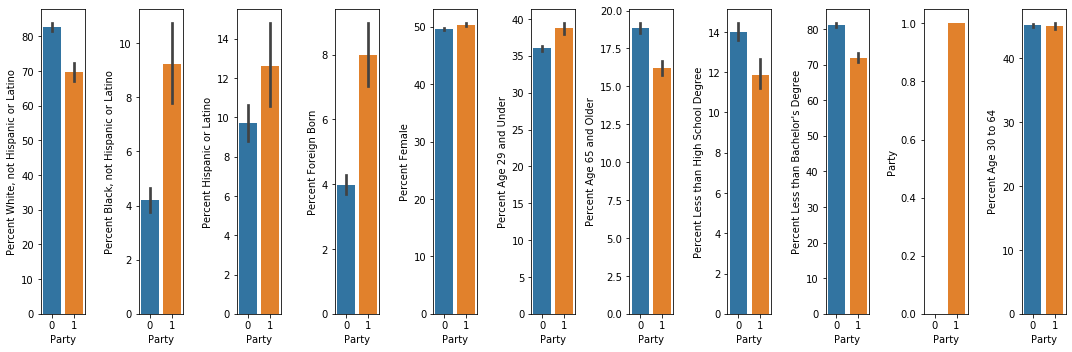

In [47]:
mergedData1=mergedData.drop(["County","State","Democratic","Republican","FIPS","Total Population","Median Household Income","Percent Unemployed","Percent Rural"],axis=1)
mergedData1['Percent Age 30 to 64'] = 100 - mergedData['Percent Age 29 and Under'] - mergedData['Percent Age 65 and Older']
num_columns = len(mergedData1.columns)
fig, axes = plt.subplots(1, num_columns, figsize = (15, 5))
for i in range(num_columns):
    sns.barplot(x = 'Party', y = mergedData1.columns[i], data = mergedData1, orient = 'v', ax = axes[i])
plt.tight_layout()

In [48]:
formaps=({"FIPS":mergedData['FIPS'],"Party":mergedData['Party'].astype(str).map({"0":"Republican","1":"Democratic"}),
                })
Map=pd.DataFrame(formaps)
Map
fips =Map["FIPS"]
values = Map["Party"]

fig = ff.create_choropleth(fips=fips, values=values , colorscale=["#0080FF","#FF0033"],county_outline={'color': 'rgb(15, 15, 55)', 'width': 0.5},
                           state_outline={'color': 'rgb(15, 15, 55)','width': 1})
fig.layout.template = None
fig.show()

/Users/saiha/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.


